converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"Warning message in plot.window(...):
""k" is not a graphical parameter"Warning message in plot.window(...):
""labels" is not a graphical parameter"Warning message in plot.window(...):
""isLog" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""k" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""labels" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""isLog" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""k" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""isLog" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""k" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""isLog" is not a graphical parameter"Wa

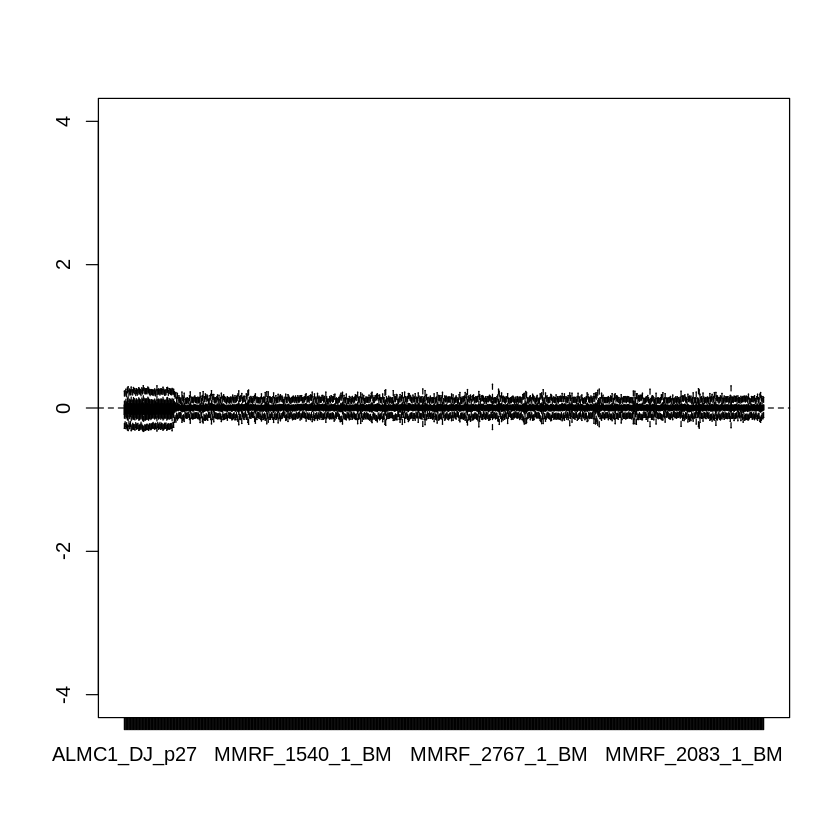

converting counts to integer mode
Warning message in validityMethod(object):
"'counts' contains non-integer numbers"

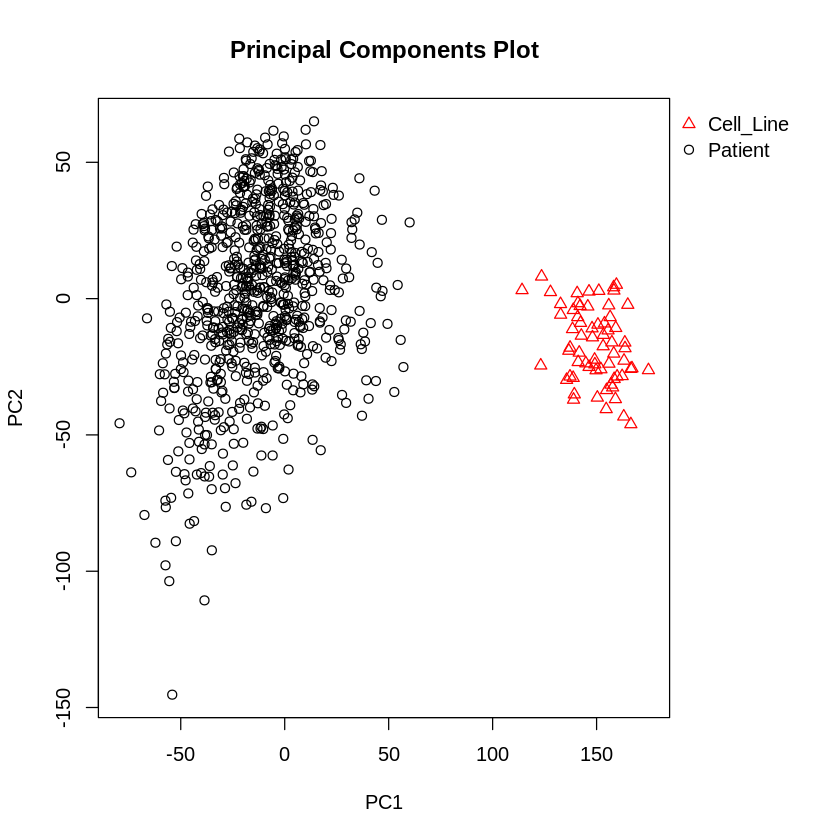

Warning message in plot.window(...):
""k" is not a graphical parameter"Warning message in plot.window(...):
""labels" is not a graphical parameter"Warning message in plot.window(...):
""isLog" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""k" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""labels" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""isLog" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""k" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""isLog" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""k" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""isLog" is not a graphical parameter"Warning message in box(...):
""k" is not a graphical parameter"Warning message in box(...):
""labels" is not a graphic

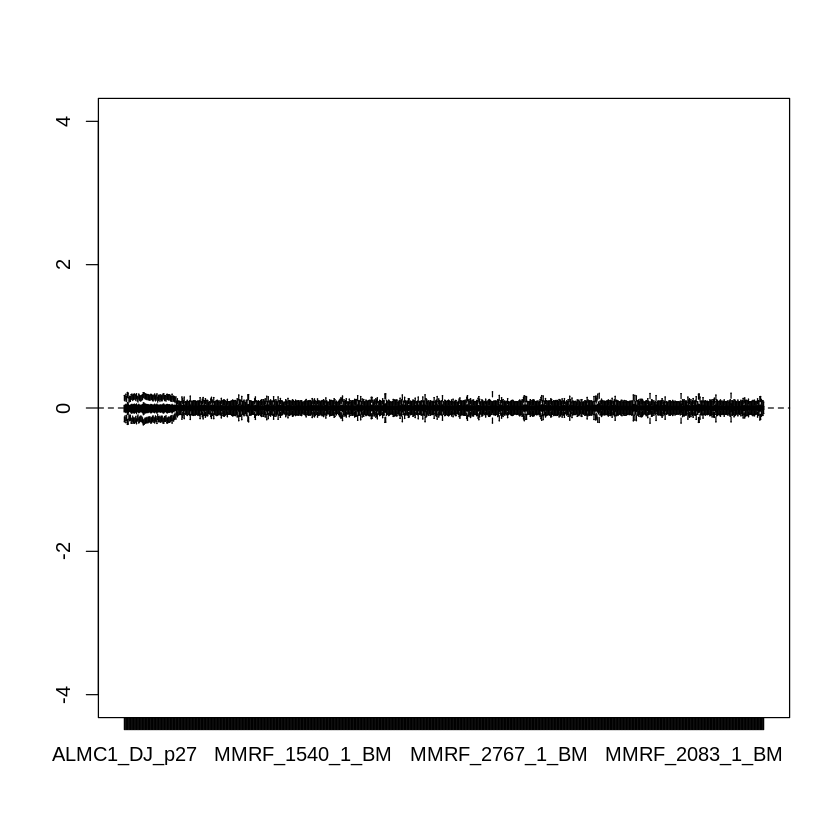

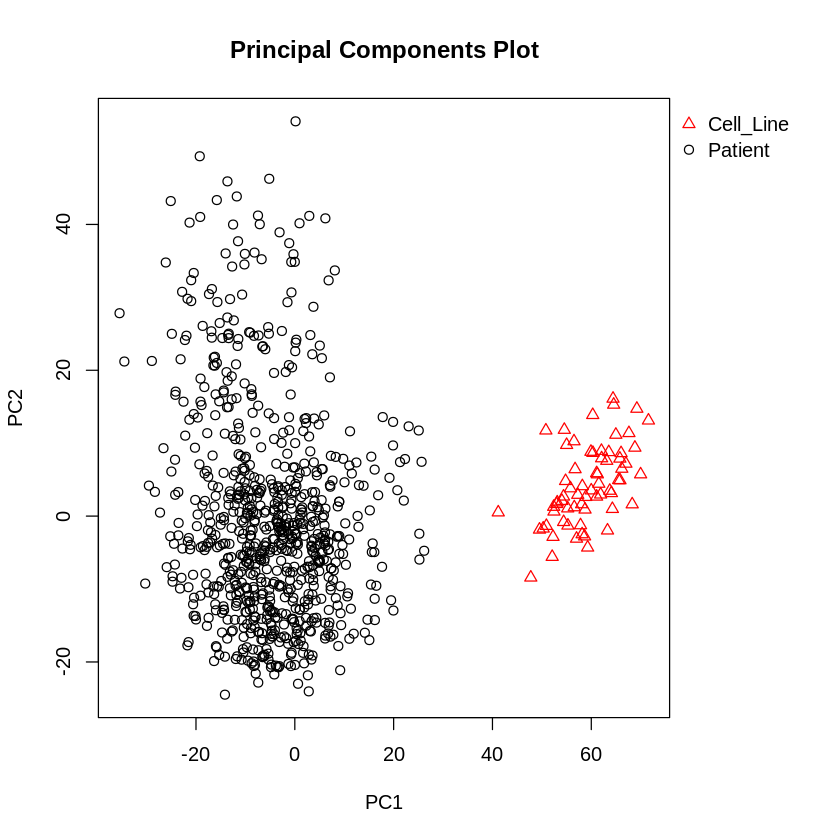

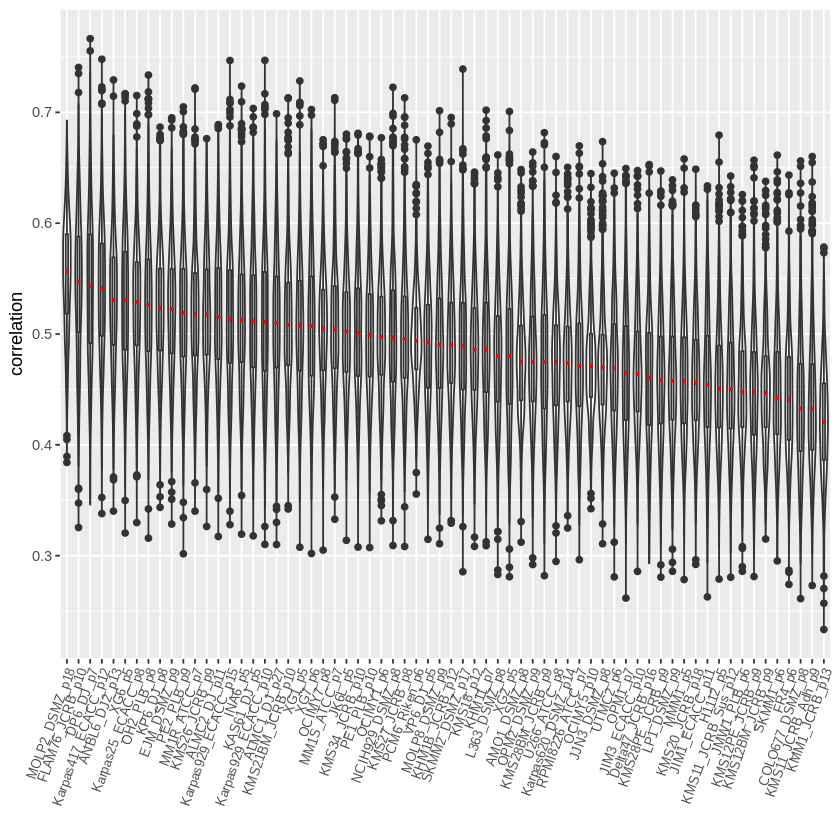

In [73]:
setwd('~/Downloads/proj/')

library(data.table)
library(edgeR)
library(EDASeq)
library(RUVSeq)
library(affycoretools)
library(ggplot2)
library(DESeq2)
require(dplyr)
require(stringr)

#project directories, and libraries loaded

MM_cell_line = data.frame(fread("HMCL66_HTSeq_GENE_Counts_v2.txt"))
MM_patients = data.frame(fread("MMRF_CoMMpass_IA13a_E74GTF_HtSeq_Gene_Counts.txt"))

#reading and creating data frames from gene count data

ensembl_intersect = intersect(MM_cell_line$Sample, MM_patients$GENE_ID)

#finding genes in common and creating character vector of Ensembl Gene IDs

rownames(MM_cell_line) = MM_cell_line$Sample
rownames(MM_patients) = MM_patients$GENE_ID

#assigning rownames as ensembl gene IDs so as to be able to parse by ensembl Gene IDs

MM_cell_line = MM_cell_line[ensembl_intersect, -1]
MM_patients = MM_patients[ensembl_intersect, -1]
MM_patient_ids = data.frame(colnames(MM_patients))
MM_patients_new = filter(MM_patient_ids, str_extract(MM_patient_ids[,1], "_[0-9]_") == "_1_")
keepc = colnames(MM_patients) %in% MM_patients_new[,1]
MM_patients = MM_patients[,keepc]

MM_patients_trans = data.frame(fread("IA13a.structural.variants.annot.translocations.clean.maxHom0.8.minMap0.2.clonality.readRange10000bp.cnvRange2000bp.common.txt"))
MM_patient_trans_ids = MM_patients_trans[,'sample']
keepMYC = as.logical(MM_patients_trans[,'t.MYC.'])
MM_patients_trans_MYC = MM_patient_trans_ids[keepMYC]
MM_patients_trans_MYC = unique(MM_patients_trans_MYC)
MM_patients_new_trans_MYC = filter(as.data.frame(MM_patients_trans_MYC),
                                   str_extract(as.data.frame(MM_patients_trans_MYC)[,1], "_[0-9]_") == "_1_")
keepcMYC = colnames(MM_patients) %in% MM_patients_new_trans_MYC[,1]
MM_patients_MYC = MM_patients[,keepcMYC]
keep414 = as.logical(MM_patients_trans[,'t.4.14.'])
MM_patients_trans_414 = MM_patient_trans_ids[keep414]
MM_patients_trans_414 = unique(MM_patients_trans_414)
MM_patients_new_trans_414 = filter(as.data.frame(MM_patients_trans_414),
                                   str_extract(as.data.frame(MM_patients_trans_414)[,1], "_[0-9]_") == "_1_")
keepc414 = colnames(MM_patients) %in% MM_patients_new_trans_414[,1]
MM_patients_414 = MM_patients[,keepc414]
keep1114 = as.logical(MM_patients_trans[,'t.11.14.'])
MM_patients_trans_1114 = MM_patient_trans_ids[keep1114]
MM_patients_trans_1114 = unique(MM_patients_trans_1114)
MM_patients_new_trans_1114 = filter(as.data.frame(MM_patients_trans_1114),
                                   str_extract(as.data.frame(MM_patients_trans_1114)[,1], "_[0-9]_") == "_1_")
keepc1114 = colnames(MM_patients) %in% MM_patients_new_trans_1114[,1]
MM_patients_1114 = MM_patients[,keepc1114]
keep1420 = as.logical(MM_patients_trans[,'t.14.20.'])
MM_patients_trans_1420 = MM_patient_trans_ids[keep1420]
MM_patients_trans_1420 = unique(MM_patients_trans_1420)
MM_patients_new_trans_1420 = filter(as.data.frame(MM_patients_trans_1420),
                                   str_extract(as.data.frame(MM_patients_trans_1420)[,1], "_[0-9]_") == "_1_")
keepc1420 = colnames(MM_patients) %in% MM_patients_new_trans_1420[,1]
MM_patients_1420 = MM_patients[,keepc1420]
keep1416 = as.logical(MM_patients_trans[,'q'])
MM_patients_trans_1416 = MM_patient_trans_ids[keep1416]
MM_patients_trans_1416 = unique(MM_patients_trans_1416)
MM_patients_new_trans_1416 = filter(as.data.frame(MM_patients_trans_1416),
                                   str_extract(as.data.frame(MM_patients_trans_1416)[,1], "_[0-9]_") == "_1_")
keepc1416 = colnames(MM_patients) %in% MM_patients_new_trans_1416[,1]
MM_patients_1416 = MM_patients[,keepc1416]
MM_combined = cbind(MM_cell_line, MM_patients)
MM_combined_MYC = cbind(MM_cell_line, MM_patients_MYC)
MM_combined_414 = cbind(MM_cell_line, MM_patients_414)
MM_combined_1114 = cbind(MM_cell_line, MM_patients_1114)
MM_combined_1420 = cbind(MM_cell_line, MM_patients_1420)
MM_combined_1416 = cbind(MM_cell_line, MM_patients_1416)

#filtering MM_cell_line and MM_patients to only those genes in common and taking out 
    #Gene name and ensembl ID columns, then combining them, also filtering for newly diagnosed patients

MM_cell_line_cpm = cpm(MM_cell_line[,-1])
MM_patients_cpm = cpm(MM_patients)

#getting counts per million for MM_cell_line, and MM_patients_cpm

keep = rowSums(cpm(MM_combined[-1]) > 1) > 2
MM_combined.filtered = MM_combined[keep, ]
MM_patients_cpm = MM_patients_cpm[keep, ]
MM_combined_MYC = MM_combined_MYC[keep,]
MM_combined_414 = MM_combined_414[keep,]
MM_combined_1114 = MM_combined_1114[keep,]
MM_combined_1420 = MM_combined_1420[keep,]
MM_combined_1416 = MM_combined_1416[keep,]
#initial filtering of MM_combined to remove low count genes (genes with greater than 
    #1 million counts in more than 2 samples are kept)

MM_gene_names = MM_combined.filtered[, 1]
MM_combined.filtered = MM_combined.filtered[, -1]

#grabbing first colunmn of MM_combined.filtered (Gene_name), only those rows specified by ensembl intersect, 
    #removing Gene_name column from MM_combined.filtered

combined_annot = data.frame(colnames(MM_combined.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
combined_annot = combined_annot[-1]
rownames(combined_annot) = rn
setv = vst(as.matrix(round(MM_combined.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

#utilizing varaince stabilization normalization method, vst(), then creating new seqExpressionSet object, 
    #using normalized counts

symbols = c(rep(2, ncol(MM_cell_line[-1])), rep(1, ncol(MM_patients)))
plotRLE(setv, outline=FALSE, ylim=c(-4, 4))
affycoretools::plotPCA(setv, groupnames = c('Cell_Line', 'Patient'), 
                       pch = symbols, col = symbols, outside = TRUE)

keepi = apply(MM_patients_cpm, 1, IQR)

keepi = sort(keepi, decreasing = TRUE)

keepi = apply(MM_patients_cpm, 1, IQR)

keepi = keepi > 17

MM_combined.filtered = MM_combined.filtered[keepi, ]
MM_cell_line.filtered = MM_cell_line[keepi,]

MM_combined_MYC.filtered = MM_combined_MYC[keepi,]
MM_combined_414.filtered = MM_combined_414[keepi,]
MM_combined_1114.filtered = MM_combined_1114[keepi,]
MM_combined_1420.filtered = MM_combined_1420[keepi,]
MM_combined_1416.filtered = MM_combined_1416[keepi,]

setv = vst(as.matrix(round(MM_combined.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)

symbols = c(rep(2, ncol(MM_cell_line[-1])), rep(1, ncol(MM_patients)))
plotRLE(setv, outline=FALSE, ylim=c(-4, 4))
affycoretools::plotPCA(setv, groupnames = c('Cell_Line', 'Patient'), 
                       pch = symbols, col = symbols, outside = TRUE)


MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )



In [75]:
MM_combined_MYC.filtered = MM_combined_MYC[keepi,]
MM_combined_MYC.filtered = MM_combined_MYC.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_MYC.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
#combined_annot = combined_annot[-1]

setv = vst(as.matrix(round(MM_combined_MYC.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)
MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_MYC)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

MM_combined_414.filtered = MM_combined_414[keepi,]
MM_combined_414.filtered = MM_combined_414.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_414.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
#combined_annot = combined_annot[-1]

setv = vst(as.matrix(round(MM_combined_414.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)
MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_414)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

MM_combined_1114.filtered = MM_combined_1114[keepi,]
MM_combined_1114.filtered = MM_combined_1114.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1114.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
#combined_annot = combined_annot[-1]

setv = vst(as.matrix(round(MM_combined_1114.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)
MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1114)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

MM_combined_1420.filtered = MM_combined_1420[keepi,]
MM_combined_1420.filtered = MM_combined_1420.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1420.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
#combined_annot = combined_annot[-1]

setv = vst(as.matrix(round(MM_combined_1420.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)
MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1420)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

MM_combined_1416.filtered = MM_combined_1416[keepi,]
MM_combined_1416.filtered = MM_combined_1416.filtered[, -1]

combined_annot = data.frame(colnames(MM_combined_1416.filtered))
combined_annot$type = "Patient"
combined_annot$type[1:ncol(MM_cell_line[-1])] = "Cell_Line"
rn = combined_annot[,1]
#combined_annot = combined_annot[-1]

setv = vst(as.matrix(round(MM_combined_1416.filtered)))
setv = newSeqExpressionSet(setv, phenoData = combined_annot)
MM.cor.v = cor(counts(setv), method = "s")

clnames = colnames(MM_cell_line[-1])
pnames = colnames(MM_patients_1416)
tumor_cell_all = data.frame()
#rownames(tumor_cell_all) = rep(clnames, length(pnames)) #clnames*(length(pnames))

for(patients in pnames){
    cell_line_tumor_cor = MM.cor.v[patients, clnames]
    cell_line_tumor_cor = data.frame(patient = patients, sample = names(cell_line_tumor_cor), cor = cell_line_tumor_cor)
    tumor_cell_all = rbind(tumor_cell_all, cell_line_tumor_cor)
}
#rownames(tumor_cell_all) = rep(clnames, length(pnames))
#print(tumor_cell_all)

cell_line_order <- aggregate(cor ~ sample, tumor_cell_all, median)
cell_line_ordered <- cell_line_order$sample[order(cell_line_order$cor, decreasing=T)]
tumor_cell_all$sample = factor(tumor_cell_all$sample, levels = cell_line_ordered)

  p <- ggplot(tumor_cell_all, aes(sample, cor))
  print(p + geom_violin()  +  ylab("correlation") + geom_boxplot(width=0.2) + 
          xlab("") +
          stat_summary(geom = "crossbar", width=0.2, fatten=2, color="red", fun.data = function(x){ return(c(y=median(x), ymin=median(x), ymax=median(x))) }) +  theme(panel.background = element_rect(color = 'white'), axis.text.x = element_text(angle = 70, hjust = 1, size=8)) 
  )

converting counts to integer mode
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.


ERROR: Error in validObject(.Object): invalid class "SeqExpressionSet" object: sampleNames differ between assayData and phenoData


In [69]:
MM_patients_trans = data.frame(fread("IA13a.structural.variants.annot.translocations.clean.maxHom0.8.minMap0.2.clonality.readRange10000bp.cnvRange2000bp.common.txt"))
keepMYC = as.logical(MM_patients_trans[,'t.MYC.'])
MM_patient_trans_ids = MM_patients_trans[,'sample']
head(MM_patients_trans)
length(keepMYC)
length(MM_patients_trans[,1])
length(MM_patient_trans_ids)
MM_patients_trans_MYC = MM_patient_trans_ids[keepMYC]
MM_patients_trans_MYC = unique(MM_patients_trans_MYC)
#MM_patients_trans_MYC = data.frame(unique(MM_patients_trans_MYC))
#length(MM_patients_trans_MYC)
head(MM_patients_trans_MYC)
length(MM_patients_trans_MYC)

MM_patients_new_trans_MYC = filter(as.data.frame(MM_patients_trans_MYC), str_extract(as.data.frame(MM_patients_trans_MYC)[,1], "_[0-9]_") == "_1_")
#keepc = colnames(MM_patients) %in% MM_patients_new[,1]
#MM_patient_trans_MYC = MM_patients_trans[1,keepMYC]
#head(MM_patient_trans_MYC[,'t.MYC.'])
length(MM_patients_new_trans_MYC[,1])









sample,name,seqnames,start,REF,QUAL,FILTER,CIEND,CIPOS,CHR2,⋯,t.22q13.1.,TR1.1MB.count,TR2.1MB.count,TR.1MB.count,TR1.1MB.vaf,TR2.1MB.vaf,TR.1MB.vaf,TR1.1MB.ccf,TR2.1MB.ccf,TR.1MB.ccf
MMRF_1016_1_BM,TRA00001390,8,119757348,A,NA,PASS,-325|325,-325|325,6,⋯,FALSE,6,6,1,0.3562697,0.2524591,0.2168675,0.6741767,0.7365814,0.4205263
MMRF_1016_1_BM,TRA00002318,11,109253683,A,NA,PASS,-366|366,-366|366,1,⋯,FALSE,7,7,1,0.3254628,0.3136976,0.1728395,0.7133975,0.6315615,0.3267074
MMRF_1016_1_BM,TRA00002319,11,109272091,T,NA,PASS,-418|418,-418|418,1,⋯,FALSE,7,3,1,0.3254628,0.2888709,0.1639344,0.7133975,0.5328694,0.2755038
MMRF_1016_1_BM,TRA00002422,12,5019811,G,NA,PASS,-346|346,-346|346,1,⋯,FALSE,23,4,1,0.3934996,0.2435802,0.1369863,0.6791406,0.5996635,0.3079354
MMRF_1016_1_BM,TRA00003392,15,39941158,T,NA,PASS,-378|378,-378|378,8,⋯,FALSE,12,6,1,0.2334838,0.2960518,0.1714286,0.5228045,0.6156307,0.3714022
MMRF_1016_1_BM,TRA00003440,15,53867502,T,NA,PASS,-411|411,-411|411,8,⋯,FALSE,9,10,1,0.2535619,0.4023987,0.1250000,0.7217277,0.7259417,0.2638105


[1] 5608

[1] 5608

[1] 5608

[1] "MMRF_1030_3_BM" "MMRF_1033_1_BM" "MMRF_1049_1_BM" "MMRF_1049_2_BM"
[5] "MMRF_1049_4_BM" "MMRF_1055_1_BM"

[1] 236

[1] 194

In [27]:
head(MM_patients)
length(colnames(MM_patients))
MM_patient_ids = data.frame(colnames(MM_patients))
#typeof(MM_patient_ids)
MM_patients_new = filter(MM_patient_ids, str_extract(MM_patient_ids[,1], "_[0-9]_") == "_1_")
#length(MM_patients)
length(MM_patients_new[,1])

colnames(MM_patients) %in% MM_patients_new[,1]
head(colnames(MM_patients))

[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[169]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[181]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[193]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[205] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[217] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[265] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[289]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[301]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE
[313]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[337]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[361]  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
[385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[397]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[409]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[421]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[469]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[493]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[517]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[529]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[541]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
[553] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[577]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[589]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[613]  TRUE  TRUE  TRUE 

[1] "GENE_ID"        "MMRF_2801_1_BM" "MMRF_2718_1_BM" "MMRF_2815_1_BM"
[5] "MMRF_1656_1_BM" "MMRF_2461_1_BM"